/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_4438/3358245053.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')


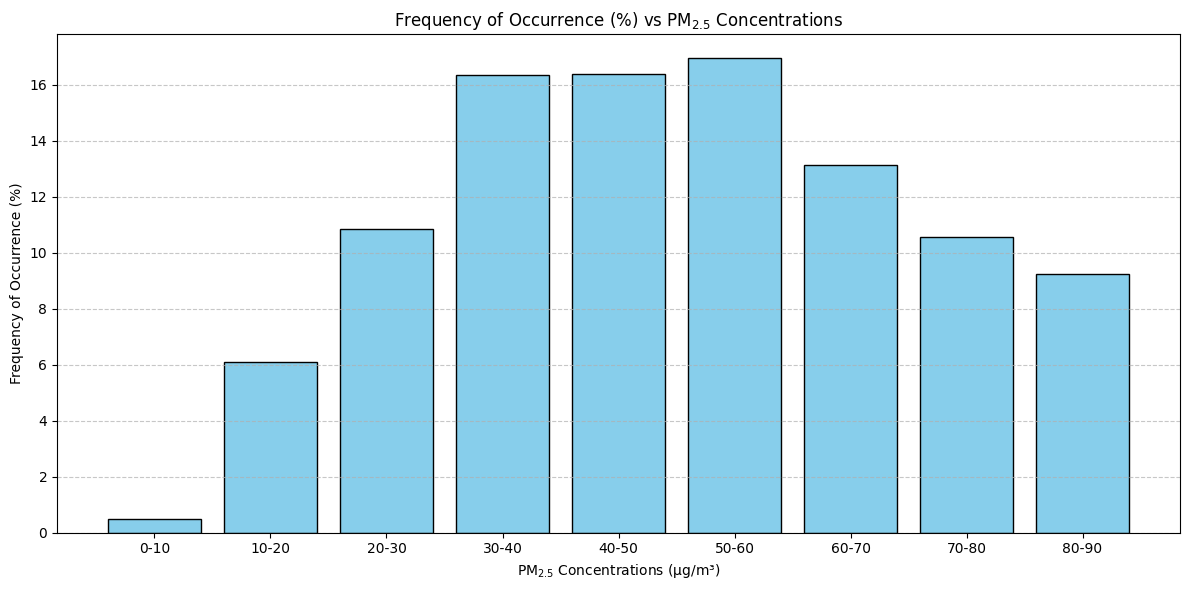

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.XLSX'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date' or 'PM2.5' is NaN
df_clean = df.dropna(subset=['From Date', 'PM2.5'])

# Convert 'From Date' to datetime
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Drop rows where conversion failed
df_clean = df_clean.dropna(subset=['From Date'])

# Define the bins for PM2.5 concentrations (0, 20, 40, 60, 80, 100 µg/m³)
# bins = [0, 20, 40, 60, 80, 100]
bins = np.arange(0, 100, 10)  # Bins from 0 to 3 µg/m³ with intervals of 0.2 µg/m³

# Calculate the histogram (frequency of occurrence) for the entire dataset
freq, _ = np.histogram(df_clean['PM2.5'], bins=bins, density=False)

# Calculate the frequency of occurrence in percentage
freq_percentage = (freq / sum(freq)) * 100

# Define x-axis labels for the bins
x_labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)]

# Plotting
plt.figure(figsize=(12, 6))

# Plotting the frequency of occurrence as a bar plot
plt.bar(x_labels, freq_percentage, color='skyblue', edgecolor='black')

plt.xlabel('PM$_{2.5}$ Concentrations (µg/m³)')
plt.ylabel('Frequency of Occurrence (%)')
plt.title('Frequency of Occurrence (%) vs PM$_{2.5}$ Concentrations')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_4438/547655898.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')


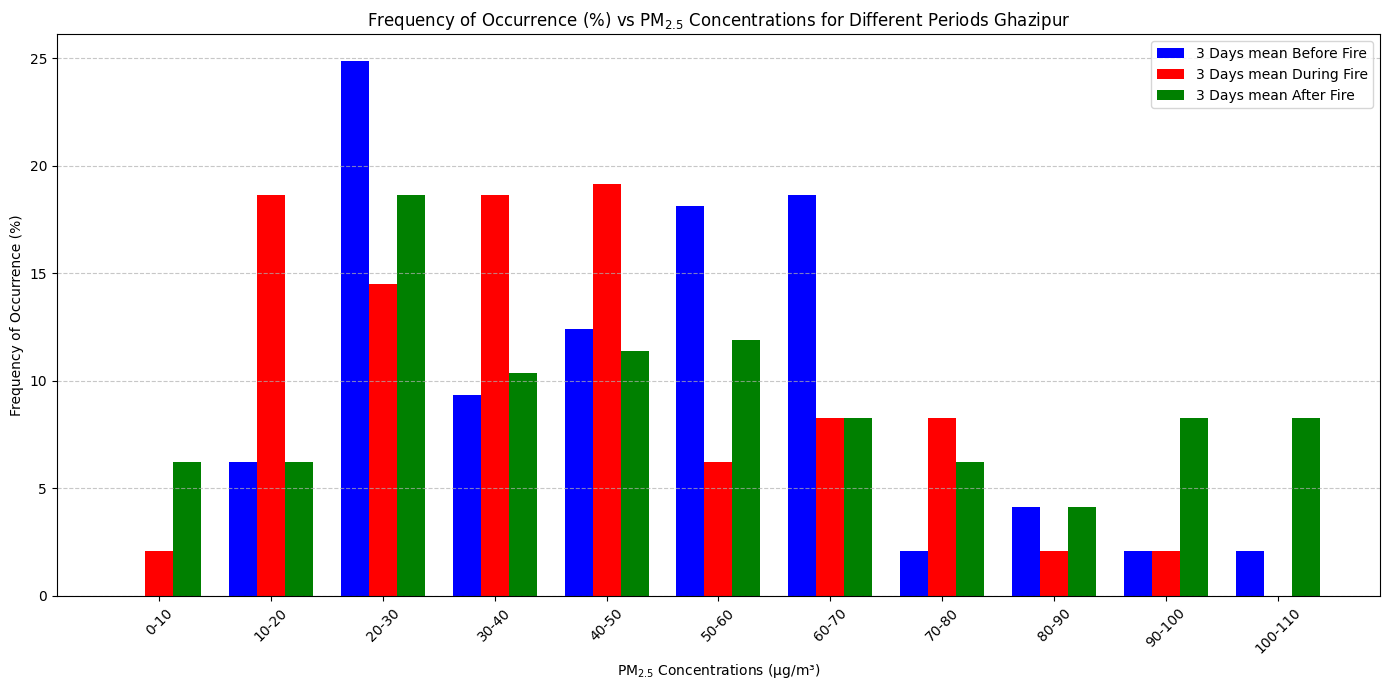

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.XLSX'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date' or 'PM2.5' is NaN
df_clean = df.dropna(subset=['From Date', 'PM2.5'])

# Convert 'From Date' to datetime
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Drop rows where conversion failed
df_clean = df_clean.dropna(subset=['From Date'])

# Define the new date ranges
pre_fire_start = '2024-04-19'
pre_fire_end = '2024-04-21'
fire_start = '2024-04-22'
fire_end = '2024-04-24'
post_fire_start = '2024-04-25'
post_fire_end = '2024-04-27'

# Filter the data for each date range
df_pre_fire = df_clean[(df_clean['From Date'] >= pre_fire_start) & (df_clean['From Date'] <= pre_fire_end)]
df_fire = df_clean[(df_clean['From Date'] >= fire_start) & (df_clean['From Date'] <= fire_end)]
df_post_fire = df_clean[(df_clean['From Date'] >= post_fire_start) & (df_clean['From Date'] <= post_fire_end)]

# Define the bins for PM2.5 concentrations (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 µg/m³)
bins = np.arange(0, 120, 10)  # Bins from 0 to 100 µg/m³ with intervals of 10 µg/m³

def calculate_percentages(df, bins):
    freq, _ = np.histogram(df['PM2.5'], bins=bins, density=False)
    freq_percentage = (freq / sum(freq)) * 100
    return freq_percentage

# Calculate the frequency of occurrence percentages for each period
freq_pre_fire_percentage = calculate_percentages(df_pre_fire, bins)
freq_fire_percentage = calculate_percentages(df_fire, bins)
freq_post_fire_percentage = calculate_percentages(df_post_fire, bins)

# Define x-axis labels for the bins
x_labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)]

# Plotting
plt.figure(figsize=(14, 7))

# Define bar width and positions
bar_width = 0.25
index = np.arange(len(x_labels))

# Plotting the bars for each period
plt.bar(index - bar_width, freq_pre_fire_percentage, bar_width, label='3 Days mean Before Fire', color='b')
plt.bar(index, freq_fire_percentage, bar_width, label='3 Days mean During Fire', color='r')
plt.bar(index + bar_width, freq_post_fire_percentage, bar_width, label='3 Days mean After Fire', color='g')

plt.xlabel('PM$_{2.5}$ Concentrations (µg/m³)')
plt.ylabel('Frequency of Occurrence (%)')
plt.title('Frequency of Occurrence (%) vs PM$_{2.5}$ Concentrations for Different Periods Ghazipur')
plt.xticks(index, x_labels, rotation=45)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_4563/1420796655.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')


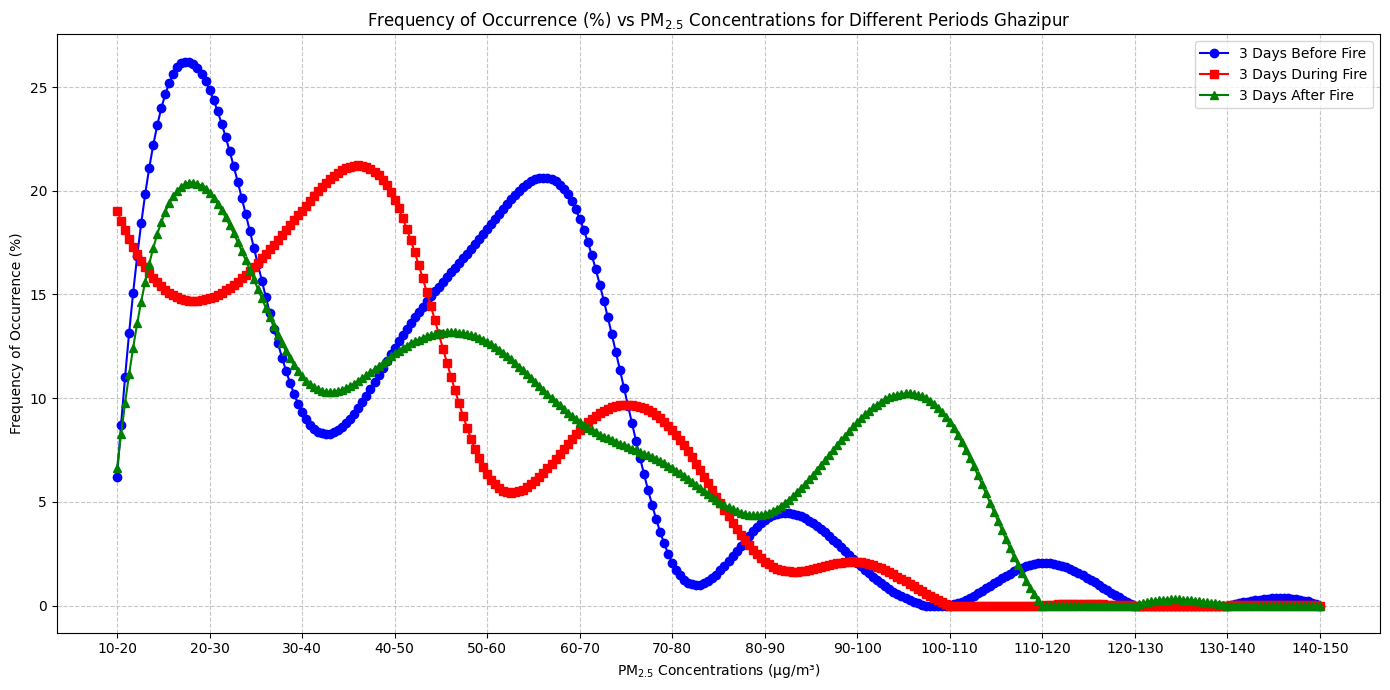

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Load the dataset
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.XLSX'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date' or 'PM2.5' is NaN
df_clean = df.dropna(subset=['From Date', 'PM2.5'])

# Convert 'From Date' to datetime
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Drop rows where conversion failed
df_clean = df_clean.dropna(subset=['From Date'])

# Define the new date ranges
pre_fire_start = '2024-04-19'
pre_fire_end = '2024-04-21'
fire_start = '2024-04-22'
fire_end = '2024-04-24'
post_fire_start = '2024-04-25'
post_fire_end = '2024-04-27'

# Filter the data for each date range
df_pre_fire = df_clean[(df_clean['From Date'] >= pre_fire_start) & (df_clean['From Date'] <= pre_fire_end)]
df_fire = df_clean[(df_clean['From Date'] >= fire_start) & (df_clean['From Date'] <= fire_end)]
df_post_fire = df_clean[(df_clean['From Date'] >= post_fire_start) & (df_clean['From Date'] <= post_fire_end)]

# Define the bins for PM2.5 concentrations (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 µg/m³)
bins = np.arange(10, 160, 10)  # Bins from 0 to 110 µg/m³ with intervals of 10 µg/m³

def calculate_percentages(df, bins):
    freq, _ = np.histogram(df['PM2.5'], bins=bins, density=False)
    total = np.sum(freq)
    if total == 0:
        return np.zeros(len(freq))  # Avoid division by zero
    freq_percentage = (freq / total) * 100
    return freq_percentage

def smooth_curve(x, y):
    x = np.array(x)
    y = np.array(y)
    
    # Remove NaN and negative values
    mask = np.isfinite(y) & (y >= 0)
    x = x[mask]
    y = y[mask]
    
    if len(x) < 2:
        raise ValueError("Not enough data points for interpolation.")
    
    x_new = np.linspace(x.min(), x.max(), 300)  # Generate 300 points between min and max
    spline = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
    y_smooth = spline(x_new)
    
    # Ensure no negative values
    y_smooth = np.clip(y_smooth, 0, None)
    
    return x_new, y_smooth

# Calculate the frequency of occurrence percentages for each period
freq_pre_fire_percentage = calculate_percentages(df_pre_fire, bins)
freq_fire_percentage = calculate_percentages(df_fire, bins)
freq_post_fire_percentage = calculate_percentages(df_post_fire, bins)

# Define x-axis labels for the bins
x_labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)]
x_bin_centers = [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins) - 1)]

# Smooth the curves
x_smooth, y_smooth_pre_fire = smooth_curve(x_bin_centers, freq_pre_fire_percentage)
x_smooth, y_smooth_fire = smooth_curve(x_bin_centers, freq_fire_percentage)
x_smooth, y_smooth_post_fire = smooth_curve(x_bin_centers, freq_post_fire_percentage)

# Plotting
plt.figure(figsize=(14, 7))

# Plotting smooth lines for each period edgecolor='g', s=25, zorder=5)
plt.plot(x_smooth, y_smooth_pre_fire, marker='o', linestyle='-', color='b', label='3 Days Before Fire')
plt.plot(x_smooth, y_smooth_fire, marker='s', linestyle='-', color='r', label='3 Days During Fire')
plt.plot(x_smooth, y_smooth_post_fire, marker='^', linestyle='-', color='g', label='3 Days After Fire')

plt.xlabel('PM$_{2.5}$ Concentrations (µg/m³)')
plt.ylabel('Frequency of Occurrence (%)')
plt.title('Frequency of Occurrence (%) vs PM$_{2.5}$ Concentrations for Different Periods Ghazipur')
plt.xticks(x_bin_centers, x_labels, rotation=0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_4698/3600393856.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')


TypeError: __init__() got an unexpected keyword argument 'title_fontweight'

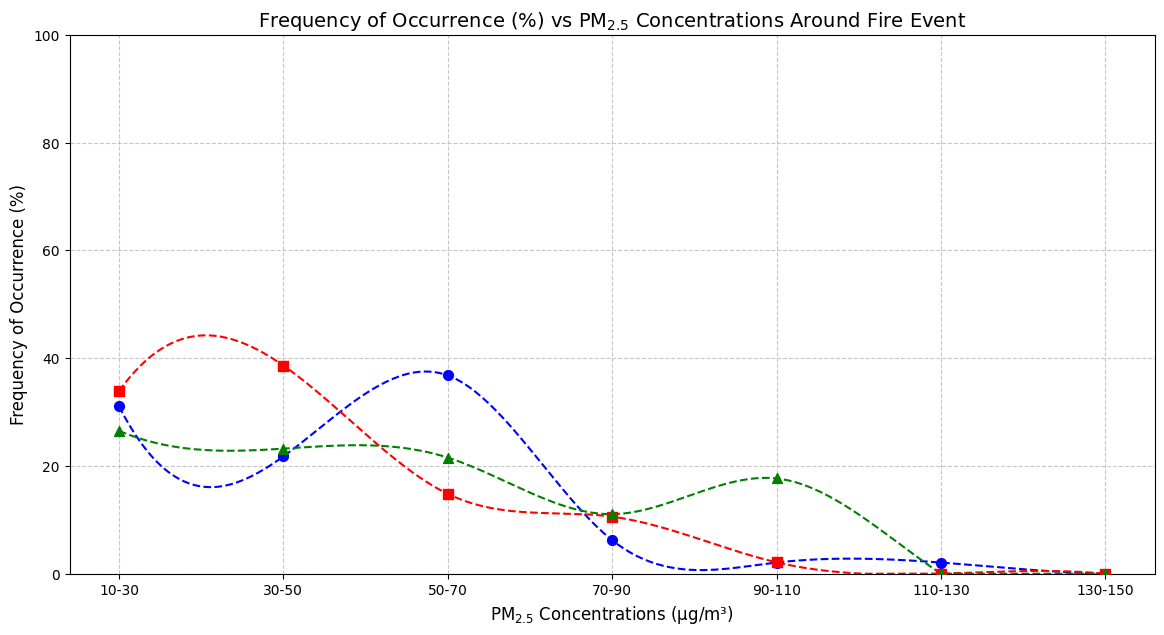

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Load the dataset
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.XLSX'
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date' or 'PM2.5' is NaN
df_clean = df.dropna(subset=['From Date', 'PM2.5'])

# Convert 'From Date' to datetime
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Drop rows where conversion failed
df_clean = df_clean.dropna(subset=['From Date'])

# Define the new date ranges
pre_fire_start = '2024-04-19'
pre_fire_end = '2024-04-21'
fire_start = '2024-04-22'
fire_end = '2024-04-24'
post_fire_start = '2024-04-25'
post_fire_end = '2024-04-27'

# Filter the data for each date range
df_pre_fire = df_clean[(df_clean['From Date'] >= pre_fire_start) & (df_clean['From Date'] <= pre_fire_end)]
df_fire = df_clean[(df_clean['From Date'] >= fire_start) & (df_clean['From Date'] <= fire_end)]
df_post_fire = df_clean[(df_clean['From Date'] >= post_fire_start) & (df_clean['From Date'] <= post_fire_end)]

# Define the bins for PM2.5 concentrations (10, 20, ..., 150 µg/m³)
bins = np.arange(10, 160, 20)  # Bins from 10 to 150 µg/m³ with intervals of 10 µg/m³

def calculate_percentages(df, bins):
    freq, _ = np.histogram(df['PM2.5'], bins=bins, density=False)
    total = np.sum(freq)
    if total == 0:
        return np.zeros(len(freq))  # Avoid division by zero
    freq_percentage = (freq / total) * 100
    return freq_percentage

def smooth_curve(x, y):
    x = np.array(x)
    y = np.array(y)
    
    # Remove NaN and negative values
    mask = np.isfinite(y) & (y >= 0)
    x = x[mask]
    y = y[mask]
    
    if len(x) < 2:
        raise ValueError("Not enough data points for interpolation.")
    
    x_new = np.linspace(x.min(), x.max(), 300)  # Generate 300 points between min and max
    spline = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
    y_smooth = spline(x_new)
    
    # Ensure no negative values
    y_smooth = np.clip(y_smooth, 0, None)
    
    return x_new, y_smooth

# Calculate the frequency of occurrence percentages for each period
freq_pre_fire_percentage = calculate_percentages(df_pre_fire, bins)
freq_fire_percentage = calculate_percentages(df_fire, bins)
freq_post_fire_percentage = calculate_percentages(df_post_fire, bins)

# Define x-axis labels for the bins and bin centers
x_labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)]
x_bin_centers = [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins) - 1)]

# Smooth the curves
x_smooth, y_smooth_pre_fire = smooth_curve(x_bin_centers, freq_pre_fire_percentage)
x_smooth, y_smooth_fire = smooth_curve(x_bin_centers, freq_fire_percentage)
x_smooth, y_smooth_post_fire = smooth_curve(x_bin_centers, freq_post_fire_percentage)

# Plotting
plt.figure(figsize=(14, 7))

# Plotting smooth lines for each period
plt.plot(x_smooth, y_smooth_pre_fire, linestyle='--', color='b', label='3 Days Before Fire')
plt.plot(x_smooth, y_smooth_fire, linestyle='--', color='r', label='3 Days During Fire')
plt.plot(x_smooth, y_smooth_post_fire, linestyle='--', color='g', label='3 Days After Fire')

# Adding markers at each bin point
plt.scatter(x_bin_centers, freq_pre_fire_percentage, color='b', marker='o', edgecolor='b', s=50, zorder=5)
plt.scatter(x_bin_centers, freq_fire_percentage, color='r', marker='s', edgecolor='r', s=50, zorder=5)
plt.scatter(x_bin_centers, freq_post_fire_percentage, color='g', marker='^', edgecolor='g', s=50, zorder=5)

plt.xlabel('PM$_{2.5}$ Concentrations (µg/m³)', fontsize=12)
plt.ylabel('Frequency of Occurrence (%)', fontsize=12)
plt.title('Frequency of Occurrence (%) vs PM$_{2.5}$ Concentrations Around Fire Event', fontsize=14)
plt.xticks(x_bin_centers, x_labels, rotation=0, fontsize=10)
plt.yticks(np.arange(0, 101, 20), fontsize=10)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, loc='best', frameon=False, title='Period', title_fontsize='13', title_fontweight='bold')

plt.tight_layout()
plt.show()


/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_4698/2214788938.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')


TypeError: set_title() got an unexpected keyword argument 'fontsize'

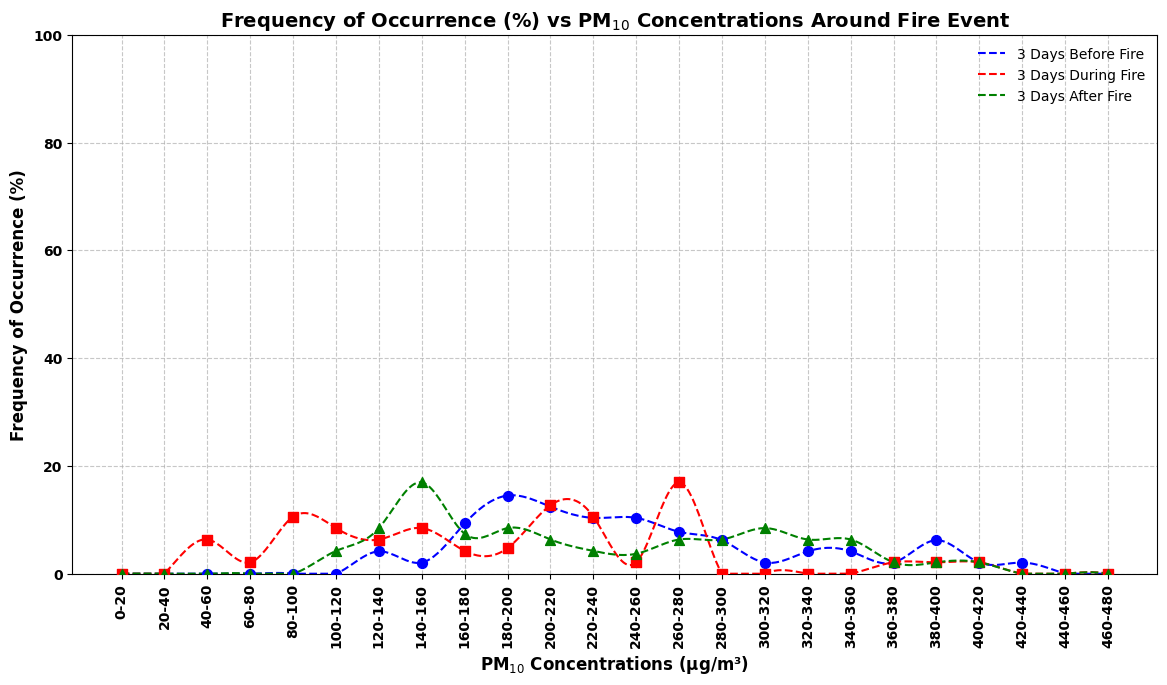

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Load the dataset
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.XLSX'
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date' or 'PM10' is NaN
df_clean = df.dropna(subset=['From Date', 'PM10'])

# Convert 'From Date' to datetime
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Drop rows where conversion failed
df_clean = df_clean.dropna(subset=['From Date'])

# Define the new date ranges
pre_fire_start = '2024-04-19'
pre_fire_end = '2024-04-21'
fire_start = '2024-04-22'
fire_end = '2024-04-24'
post_fire_start = '2024-04-25'
post_fire_end = '2024-04-27'

# Filter the data for each date range
df_pre_fire = df_clean[(df_clean['From Date'] >= pre_fire_start) & (df_clean['From Date'] <= pre_fire_end)]
df_fire = df_clean[(df_clean['From Date'] >= fire_start) & (df_clean['From Date'] <= fire_end)]
df_post_fire = df_clean[(df_clean['From Date'] >= post_fire_start) & (df_clean['From Date'] <= post_fire_end)]

# Define the bins for PM10 concentrations (10, 20, ..., 280 µg/m³)
bins = np.arange(0, 500, 20)  # Bins from 10 to 270 µg/m³ with intervals of 20 µg/m³

def calculate_percentages(df, bins):
    freq, _ = np.histogram(df['PM10'], bins=bins, density=False)
    total = np.sum(freq)
    if total == 0:
        return np.zeros(len(freq))  # Avoid division by zero
    freq_percentage = (freq / total) * 100
    return freq_percentage

def smooth_curve(x, y):
    x = np.array(x)
    y = np.array(y)
    
    # Remove NaN and negative values
    mask = np.isfinite(y) & (y >= 0)
    x = x[mask]
    y = y[mask]
    
    if len(x) < 2:
        raise ValueError("Not enough data points for interpolation.")
    
    x_new = np.linspace(x.min(), x.max(), 500)  # Generate 300 points between min and max
    spline = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
    y_smooth = spline(x_new)
    
    # Ensure no negative values
    y_smooth = np.clip(y_smooth, 0, None)
    
    return x_new, y_smooth

# Calculate the frequency of occurrence percentages for each period
freq_pre_fire_percentage = calculate_percentages(df_pre_fire, bins)
freq_fire_percentage = calculate_percentages(df_fire, bins)
freq_post_fire_percentage = calculate_percentages(df_post_fire, bins)

# Define x-axis labels for the bins and bin centers
x_labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)]
x_bin_centers = [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins) - 1)]

# Smooth the curves
x_smooth, y_smooth_pre_fire = smooth_curve(x_bin_centers, freq_pre_fire_percentage)
x_smooth, y_smooth_fire = smooth_curve(x_bin_centers, freq_fire_percentage)
x_smooth, y_smooth_post_fire = smooth_curve(x_bin_centers, freq_post_fire_percentage)

# Plotting
plt.figure(figsize=(14, 7))

# Plotting smooth lines for each period
plt.plot(x_smooth, y_smooth_pre_fire, linestyle='--', color='b', label='3 Days Before Fire')
plt.plot(x_smooth, y_smooth_fire, linestyle='--', color='r', label='3 Days During Fire')
plt.plot(x_smooth, y_smooth_post_fire, linestyle='--', color='g', label='3 Days After Fire')

# Adding markers at each bin point
plt.scatter(x_bin_centers, freq_pre_fire_percentage, color='b', marker='o', edgecolor='b', s=50, zorder=5)
plt.scatter(x_bin_centers, freq_fire_percentage, color='r', marker='s', edgecolor='r', s=50, zorder=5)
plt.scatter(x_bin_centers, freq_post_fire_percentage, color='g', marker='^', edgecolor='g', s=50, zorder=5)

plt.xlabel('PM$_{10}$ Concentrations (µg/m³)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency of Occurrence (%)', fontsize=12, fontweight='bold')
plt.title('Frequency of Occurrence (%) vs PM$_{10}$ Concentrations Around Fire Event', fontsize=14, fontweight='bold')
plt.xticks(x_bin_centers, x_labels, rotation=90, fontsize=10, fontweight='bold')
plt.yticks(np.arange(0, 101, 20), fontsize=10, fontweight='bold')
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend and customize the title separately
legend = plt.legend(fontsize=10, loc='best', frameon=False)
legend.set_title('Period', fontsize='13', fontweight='bold')

plt.tight_layout()
plt.show()
